### Importing modules

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

### Data preprocessing

In [17]:
df = pd.read_csv("framingham.csv")
df.dropna(inplace=True)
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [18]:
df.drop(['currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','sysBP','diaBP','TenYearCHD'],axis=1,inplace=True)

In [19]:

df[df['diabetes'] == 1]

,male,age,education,diabetes,totChol,BMI,heartRate,glucose
37,1,52,1.0,1,178.0,40.11,75.0,225.0
44,0,53,3.0,1,311.0,21.51,76.0,215.0
56,0,54,1.0,1,266.0,17.61,88.0,55.0
66,0,62,1.0,1,212.0,29.64,100.0,202.0
96,0,63,4.0,1,239.0,26.64,88.0,126.0
...,...,...,...,...,...,...,...,...
4096,0,56,1.0,1,273.0,27.73,90.0,210.0
4154,1,52,2.0,1,269.0,26.60,70.0,80.0
4203,1,63,1.0,1,240.0,30.48,75.0,120.0
4215,0,63,1.0,1,236.0,39.17,78.0,79.0


### Training the model

In [20]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)


c:\Users\vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making predictions

<AxesSubplot: xlabel='totChol', ylabel='diabetes'>

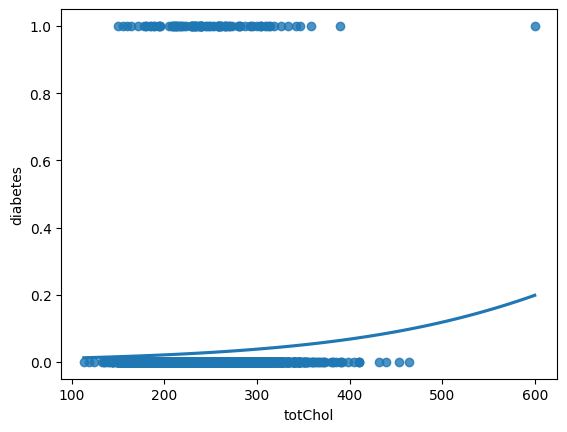

In [24]:
import seaborn as sns
sns.regplot(x=df['totChol'], y=df['diabetes'], data=df, logistic=True, ci=None)



In [25]:
predictions = log_model.predict(X_test)

### Accuracy

In [26]:
from sklearn.metrics import classification_report

classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1068\n           1       1.00      0.52      0.68        29\n\n    accuracy                           0.99      1097\n   macro avg       0.99      0.76      0.84      1097\nweighted avg       0.99      0.99      0.99      1097\n'

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1068,    0],
       [  14,   15]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9872379216043756